# UFO Shape Classifier

**Objective** : 

**Data BackGround**

Data Source: https://www.kaggle.com/datasets/NUFORC/ufo-sightings?resource=download

Context
- This dataset contains over 80,000 reports of UFO sightings over the last century.

Content
- There are two versions of this dataset: scrubbed and complete. The complete data includes entries where the location of the sighting was not found or blank (0.8146%) or have an erroneous or blank time (8.0237%). Since the reports date back to the 20th century, some older data might be obscured. Data contains city, state, time, description, and duration of each sighting.

Inspiration
1. What areas of the country are most likely to have UFO sightings?
2. Are there any trends in UFO sightings over time? Do they tend to be clustered or seasonal?
3. Do clusters of UFO sightings correlate with landmarks, such as airports or government research centers?
4. What are the most common UFO descriptions?

Acknowledgement
This dataset was scraped, geolocated, and time standardized from NUFORC data by Sigmond Axel here.

How can we classify UFO sightings based on their shapes and identify any other potential trends or patterns using machine learning?

Data Source
The primary dataset for this project is sourced from Kaggle: https://www.kaggle.com/datasets/NUFORC/ufo-sightings/dataLinks to an external site.

Techniques Expected to Use in Analysis

- Data Preprocessing: Cleaning and preparing the data for analysis, including handling missing values and standardizing formats.
- Exploratory Data Analysis (EDA): Initial examination of the data to uncover basic patterns, anomalies, and insights.
- Feature Engineering: Creating relevant features that may improve the performance of the machine learning models.
 

Machine Learning Models:

- Multi-Class Classification Algorithms: Techniques such as Decision Trees, Random Forest, Support Vector Machines (SVM), and Neural Networks to classify UFO shapes.
- Clustering Algorithms: Methods like K-Means and DBSCAN to identify patterns and trends in the data.
 

Model Evaluation and Validation: Using metrics like accuracy, precision, recall, F1-score, and cross-validation techniques to evaluate the models' performance.
 

Expected Results

- A robust classification model capable of accurately predicting UFO shapes based on sighting reports.
- Identification of temporal and geographical trends in UFO sightings, such as seasonal patterns and regional hotspots.
- Insights into correlations between UFO sightings and various landmarks or significant locations.

Importance of the Question

- Understanding the patterns and classifications of UFO sightings has several important implications:

- Public Interest and Safety: By identifying patterns in UFO sightings, we can address public curiosity and concerns. If certain shapes or trends correlate with specific times or locations, authorities can better manage public safety and information dissemination.

- Scientific Inquiry: This research can contribute to the broader scientific community's understanding of unexplained aerial phenomena. By providing a systematic analysis of UFO sightings, we add to the body of knowledge that may inspire further research and technological advancements.

- Policy Making: Insights from this analysis can aid governmental and defense agencies in resource allocation and preparedness. Recognizing patterns in sightings might help in developing protocols for investigation and response.

- Cultural Impact: UFO sightings are a part of modern folklore and cultural identity. This project can provide a data-driven narrative that complements anecdotal evidence, enriching cultural and historical contexts.

If this question remains unanswered, a significant portion of UFO-related data would remain underutilized, and public curiosity would be left unaddressed. Moreover, potential patterns and trends that could have practical implications for safety and policy-making would go unnoticed. By conducting this analysis, we provide actionable intelligence that can inform various stakeholders and contribute to a more informed and prepared society.

Overall, this project aims to bridge the gap between anecdotal UFO sightings and empirical analysis, providing clarity and insights into a phenomenon that has captivated human imagination for decades.

In [81]:
# Gathering and Importing neccessary resources and tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import logging
import json
import time
import pprint

# Natural Language ToolKit Package
import nltk


### Data Understanding 

In [52]:
# Read in UFO data

UFO = pd.read_csv('Data/scrubbed.csv')
UFO.head()

C:\Users\shiva\AppData\Local\Temp\ipykernel_26512\4001445860.py:3: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  UFO = pd.read_csv('Data/scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [53]:
UFO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


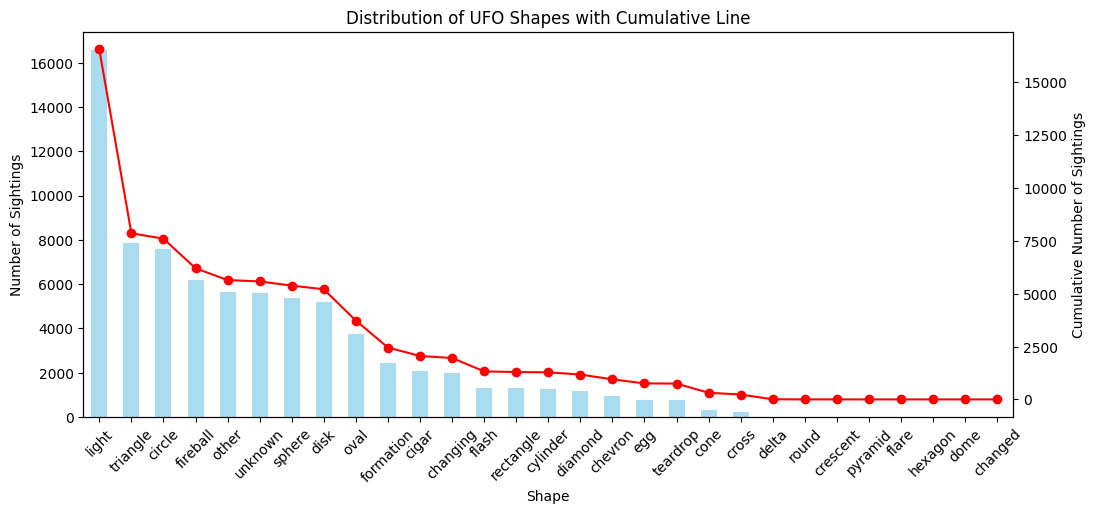

In [57]:
# Target feature distribution (shape)

ufo_shape_counts = UFO['shape'].value_counts()

plt.figure(figsize=(12,5))
ax = ufo_shape_counts.plot(kind='bar', color='skyblue', alpha = 0.7)
ufo_shape_counts.plot(kind='line', color='red', marker='o', ax=ax, secondary_y=True)

ax.set_title('Distribution of UFO Shapes with Cumulative Line')
ax.set_xlabel('Shape')
ax.set_ylabel('Number of Sightings')
ax.right_ax.set_ylabel('Cumulative Number of Sightings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()


In [59]:
UFO.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


### Data Cleaning and Imputation

Cleaning steps:

1. Create new data set for cleaning while preserving original dataset.
1. Remove duration(hours/min) column as duration in seconds is present. Removed due to redundency.
1. Transform feature to their respective datatype (numeric to int or float, datetime to datetime, etc...).
1. Analyse and impute state and county feature.
1. Drop rows with NA values in target feature (Shape).
1. 
1. 

In [71]:
# creating new dataset for cleaning purposes
ufo_clean = UFO.copy()

# Dropping duration(hours/min) column
ufo_clean.drop(columns = 'duration (hours/min)', inplace = True)

#Transform dates to datetime
ufo_clean['datetime'] = pd.to_datetime(ufo_clean['datetime'], errors='coerce')
ufo_clean['date posted'] = pd.to_datetime(ufo_clean['date posted'], errors='coerce')

#Transforming duration to int datatype and latitude to float
ufo_clean['duration (seconds)'] = pd.to_numeric(ufo_clean['duration (seconds)'], errors='coerce')
ufo_clean['latitude'] = pd.to_numeric(ufo_clean['latitude'], errors='coerce')

ufo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            79638 non-null  datetime64[ns]
 1   city                80332 non-null  object        
 2   state               74535 non-null  object        
 3   country             70662 non-null  object        
 4   shape               78400 non-null  object        
 5   duration (seconds)  80329 non-null  float64       
 6   comments            80317 non-null  object        
 7   date posted         80332 non-null  datetime64[ns]
 8   latitude            80331 non-null  float64       
 9   longitude           80332 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 6.1+ MB


##### Impute state and county features

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'us'),
  Text(1, 0, 'ca'),
  Text(2, 0, 'gb'),
  Text(3, 0, 'au'),
  Text(4, 0, 'de')])

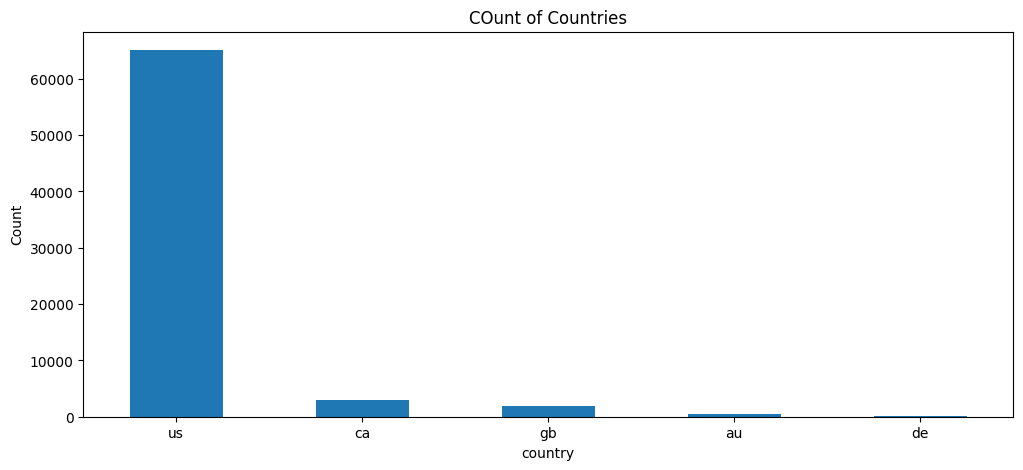

In [106]:
plt.figure(figsize=(12,5))
country_counts = ufo_clean['country'].value_counts()

country_counts.plot(kind='bar')
plt.title("COunt of Countries")
plt.ylabel("Count")
plt.xticks(rotation = 360)

In [75]:
# Checking country and state feature wher country is NA
ufo_clean[ufo_clean['country'].isnull()][['country','state']] 

,country,state
1,NaN,tx
18,NaN,NaN
29,NaN,ab
35,NaN,NaN
40,NaN,ny
...,...,...
80238,NaN,co
80244,NaN,me
80319,NaN,nj
80322,NaN,NaN


In [114]:
#Understanding states within non US or Canada countries
ufo_clean[ufo_clean['country'].isin(['gb','de','au']) & ufo_clean['state'].notna()][['country','state']].sort_values(by = 'country')

,country,state
2060,au,nt
58373,au,sa
49178,au,nt
48068,au,yt
74289,au,sa
31973,au,wa
78037,au,oh
20539,au,dc
6216,au,wa
21335,au,al


There seems to be an issue with some of the data points. Non US and Canada countries have minimal to no state values and some are mis-mapped. For example, from the above dataframe, nc is a US state, but it is mapped with gb. Due to this inconsistency, we will need to replace non US and canada countries state values with their own country code to avoid misinterpretation of the data. 

It looks like while state values exist, the country is NaN. We can see that 'tx' is a state in US. Using logical imputation, we can fill in the county NA values by using an exisitng state value

In [96]:
# Unique State values, there are about 68 unique state values where 50 of them are of US states
state_list = ufo_clean['state'].unique().tolist()
state_list = pd.DataFrame(state_list)
state_list.T

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,tx,NaN,hi,tn,ct,al,fl,ca,nc,ny,...,ns,qc,de,nd,dc,nt,sa,yt,yk,pe


In [ ]:
# List of valid US state abbreviations
us_states = [
    'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 
    'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 
    'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 
    'wi', 'wy'
]

#List of Canadian provinces
canadian_provinces = ['ab', 'on', 'nf', 'bc', 'mb', 'nb', 'ns', 'qc', 'nt', 'yt', 'sk', 'pq', 'sa']


